In [201]:
# This notebook generates the graphs and information used in the results folder

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# print("Current Working Directory:", os.getcwd())

# # Change to the desired directory
# os.chdir('c:/DS4002_Project3')
# Load the CSV file with bird species and their median ratios
df = pd.read_csv('OUTPUT/bird_beak_to_body_medians.csv')
df_mean = pd.read_csv('OUTPUT/bird_beak_to_body_ratios.csv')

sns.set(style="whitegrid")



C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3262439115.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)
C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3262439115.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)


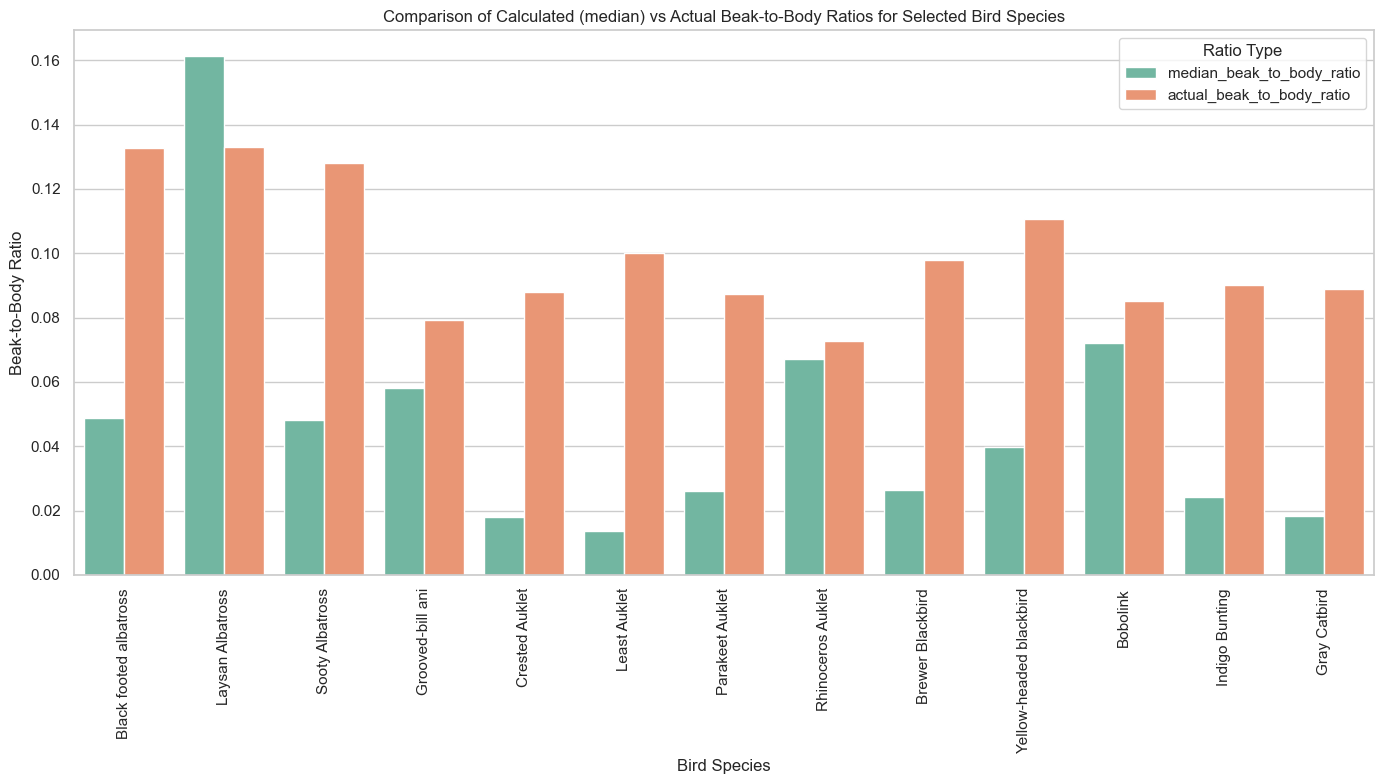

C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3262439115.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_filtered['bird_species_cleaned'] = df_mean_filtered['bird_species'].map(species_name_map)
C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3262439115.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_filtered['actual_beak_to_body_ratio'] = df_mean_filtered['bird_species_cleaned'].map(actual_ratios)


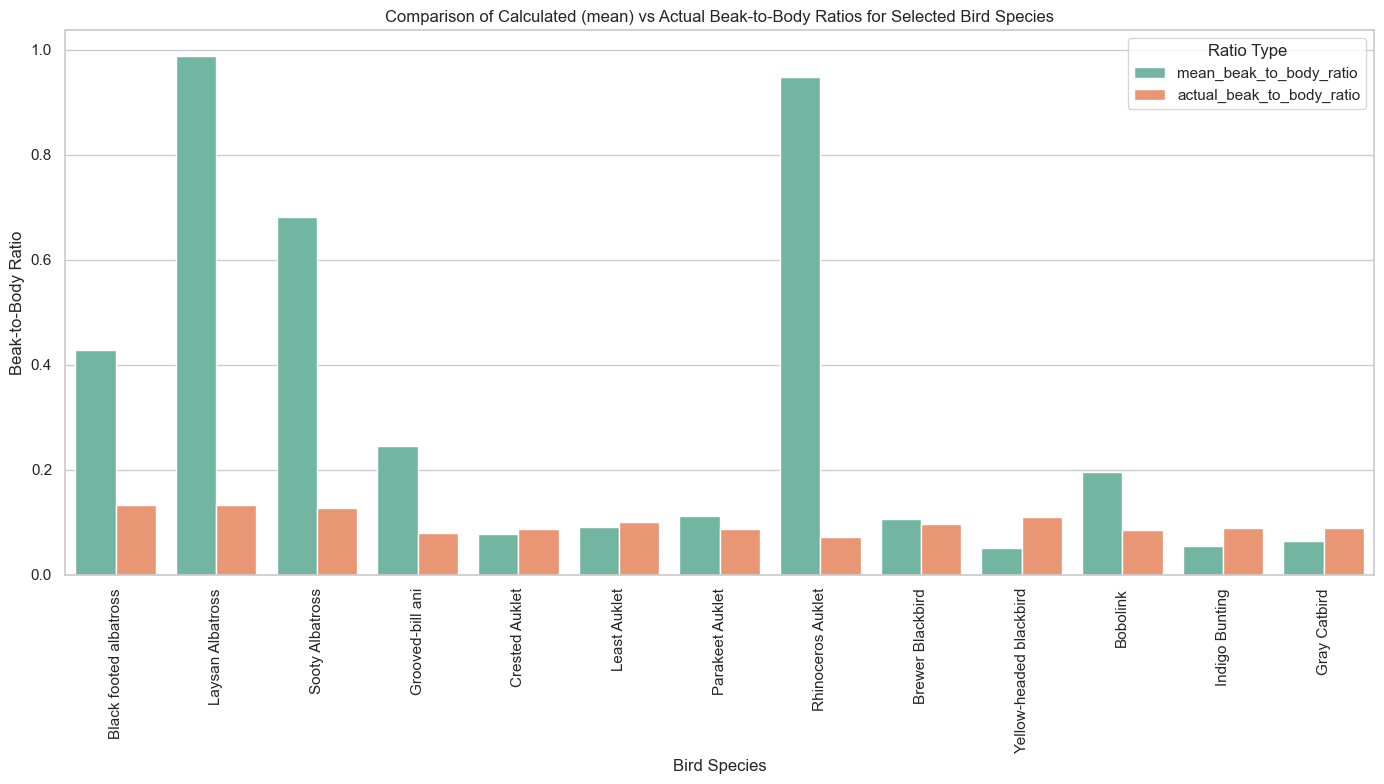

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the actual beak-to-body ratios (manually mapped) calculated from values taken from AVONET
actual_ratios = {
    "Black footed albatross": 0.132808399,
    "Laysan Albatross": 0.1328740157,
    "Sooty Albatross": 0.1281176471,
    "Grooved-bill ani": 0.07911764706,
    "Rhinoceros Auklet": 0.07285714286,
    "Crested Auklet": 0.08791666667,
    "Least Auklet": 0.1,
    "Parakeet Auklet": 0.08739130435,
    "Yellow-headed blackbird": 0.1107283465,
    "Indigo Bunting": 0.09,
    "Bobolink": 0.08503937008,
    "Brewer Blackbird": 0.09777623951,
    "Gray Catbird": 0.08893006021
}

# Mapping from directory names to cleaned species names
species_name_map = {
    "001.Black_footed_Albatross": "Black footed albatross",
    "002.Laysan_Albatross": "Laysan Albatross",
    "003.Sooty_Albatross": "Sooty Albatross",
    "004.Groove_billed_Ani": "Grooved-bill ani",
    "008.Rhinoceros_Auklet": "Rhinoceros Auklet",
    "005.Crested_Auklet": "Crested Auklet",
    "006.Least_Auklet": "Least Auklet",
    "007.Parakeet_Auklet": "Parakeet Auklet",
    "012.Yellow_headed_Blackbird": "Yellow-headed blackbird",
    "014.Indigo_Bunting": "Indigo Bunting",
    "013.Bobolink": "Bobolink",
    "009.Brewer_Blackbird": "Brewer Blackbird",
    "019.Gray_Catbird": "Gray Catbird"
}


# Selected species list 
selected_species = [
    "Black footed albatross", "Laysan Albatross", "Sooty Albatross", "Grooved-bill ani", 
    "Rhinoceros Auklet", "Crested Auklet", "Least Auklet", "Parakeet Auklet", 
    "Yellow-headed blackbird", "Indigo Bunting", "Bobolink", "Brewer Blackbird", 
    "Gray Catbird"
]

# Filter bird species
df_filtered = df[df['bird_species'].isin(species_name_map.keys())]
df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)
df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
df_melted = df_filtered.melt(id_vars=['bird_species_cleaned'], value_vars=['median_beak_to_body_ratio', 'actual_beak_to_body_ratio'], 
                             var_name='Ratio Type', value_name='Ratio')
# Plot estimated beak to body (based on median) ratio against actual ratio
sns.barplot(x='bird_species_cleaned', y='Ratio', hue='Ratio Type', data=df_melted, palette='Set2')
plt.title('Comparison of Calculated (median) vs Actual Beak-to-Body Ratios for Selected Bird Species')
plt.xlabel('Bird Species')
plt.ylabel('Beak-to-Body Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Filter bird species based on the mean
df_mean_filtered = df_mean[df_mean['bird_species'].isin(species_name_map.keys())]
df_mean_filtered['bird_species_cleaned'] = df_mean_filtered['bird_species'].map(species_name_map)
df_mean_filtered['actual_beak_to_body_ratio'] = df_mean_filtered['bird_species_cleaned'].map(actual_ratios)

plt.figure(figsize=(14, 8))
# Plot estimated beak to body (based on mean) ratio against actual ratio
df_mean_melted = df_mean_filtered.melt(id_vars=['bird_species_cleaned'], value_vars=['mean_beak_to_body_ratio', 'actual_beak_to_body_ratio'], 
                             var_name='Ratio Type', value_name='Ratio')
sns.barplot(x='bird_species_cleaned', y='Ratio', hue='Ratio Type', data=df_mean_melted, palette='Set2')
plt.title('Comparison of Calculated (mean) vs Actual Beak-to-Body Ratios for Selected Bird Species')
plt.xlabel('Bird Species')
plt.ylabel('Beak-to-Body Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [204]:
# from scipy import stats
# t_stat, p_value = stats.ttest_rel(df_mean_filtered['mean_beak_to_body_ratio'], df_mean_filtered['actual_beak_to_body_ratio'])

# print(f"T-statistic: {t_stat:.4f}")
# print(f"P-value: {p_value:.4f}")
# if p_value < 0.05:
#     print("The differences between calculated and actual mean ratios are statistically significant.")
# else:
#     print("The differences between calculated and actual mean ratios are not statistically significant.")


In [205]:
import pandas as pd

# Data for actual beak-to-body ratios (manually mapped)
actual_ratios = {
    "Black footed albatross": 0.132808399,
    "Laysan Albatross": 0.1328740157,
    "Sooty Albatross": 0.1281176471,
    "Grooved-bill ani": 0.07911764706,
    "Rhinoceros Auklet": 0.07285714286,
    "Crested Auklet": 0.08791666667,
    "Least Auklet": 0.1,
    "Parakeet Auklet": 0.08739130435,
    "Yellow-headed blackbird": 0.1107283465,
    "Indigo Bunting": 0.09,
    "Bobolink": 0.08503937008,
    "Brewer Blackbird": 0.09777623951,
    "Gray Catbird": 0.08893006021
}

# Body lengths in mm for each bird species
body_lengths = {
    "Black footed albatross": 762,
    "Laysan Albatross": 812.8,
    "Sooty Albatross": 850,
    "Grooved-bill ani": 340,
    "Rhinoceros Auklet": 350,
    "Crested Auklet": 240,
    "Least Auklet": 150,
    "Parakeet Auklet": 230,
    "Yellow-headed blackbird": 203.2,
    "Indigo Bunting": 130,
    "Bobolink": 190.5,
    "Brewer Blackbird": 231.14,
    "Gray Catbird": 215.9
}

# Mapping from directory names (with numbers and underscores) to cleaned species names
species_name_map = {
    "001.Black_footed_Albatross": "Black footed albatross",
    "002.Laysan_Albatross": "Laysan Albatross",
    "003.Sooty_Albatross": "Sooty Albatross",
    "004.Groove_billed_Ani": "Grooved-bill ani",
    "008.Rhinoceros_Auklet": "Rhinoceros Auklet",
    "005.Crested_Auklet": "Crested Auklet",
    "006.Least_Auklet": "Least Auklet",
    "007.Parakeet_Auklet": "Parakeet Auklet",
    "012.Yellow_headed_Blackbird": "Yellow-headed blackbird",
    "014.Indigo_Bunting": "Indigo Bunting",
    "013.Bobolink": "Bobolink",
    "009.Brewer_Blackbird": "Brewer Blackbird",
    "019.Gray_Catbird": "Gray Catbird"
}

# Load the mean ratios CSV and the median ratios CSV
df_mean = pd.read_csv('OUTPUT/bird_beak_to_body_ratios.csv')
df_median = pd.read_csv('OUTPUT/bird_beak_to_body_medians.csv')

# Merge the two datasets on the bird species
df = pd.merge(df_mean, df_median, on='bird_species', suffixes=('_mean', '_median'))
df_filtered = df[df['bird_species'].isin(species_name_map.keys())] # Filter the dataframe to include only the selected species


df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map) # Map the cleaned species names from the directory names


# Add the actual ratios and body lengths as new columns to the dataframe
df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)
df_filtered['body_length'] = df_filtered['bird_species_cleaned'].map(body_lengths)

# Calculate the estimated beak lengths using both median and mean ratios
df_filtered['estimated_beak_length_median'] = df_filtered['body_length'] * df_filtered['median_beak_to_body_ratio']
df_filtered['estimated_beak_length_mean'] = df_filtered['body_length'] * df_filtered['mean_beak_to_body_ratio']

# Compare the actual ratio with the estimated ratios
df_filtered['difference_median'] = abs(df_filtered['actual_beak_to_body_ratio'] - df_filtered['median_beak_to_body_ratio'])
df_filtered['difference_mean'] = abs(df_filtered['actual_beak_to_body_ratio'] - df_filtered['mean_beak_to_body_ratio'])

print(df_filtered[['bird_species_cleaned', 'actual_beak_to_body_ratio', 
                   'estimated_beak_length_median', 'estimated_beak_length_mean', 
                   'difference_median', 'difference_mean']])


       bird_species_cleaned  actual_beak_to_body_ratio  \
0    Black footed albatross                   0.132808   
1          Laysan Albatross                   0.132874   
2           Sooty Albatross                   0.128118   
3          Grooved-bill ani                   0.079118   
4            Crested Auklet                   0.087917   
5              Least Auklet                   0.100000   
6           Parakeet Auklet                   0.087391   
7         Rhinoceros Auklet                   0.072857   
8          Brewer Blackbird                   0.097776   
11  Yellow-headed blackbird                   0.110728   
12                 Bobolink                   0.085039   
13           Indigo Bunting                   0.090000   
18             Gray Catbird                   0.088930   

    estimated_beak_length_median  estimated_beak_length_mean  \
0                      37.109400                  327.008836   
1                     131.023360                  802.64903

C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3454848828.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map) # Map the cleaned species names from the directory names
C:\Users\elija\AppData\Local\Temp\ipykernel_14684\3454848828.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)
C:\Users\elija\AppData\Local\Temp\ipykern

In [206]:
estimated_beak_length_median_column = df_filtered["estimated_beak_length_mean"]
estimated_beak_length_mean_list = estimated_beak_length_median_column.tolist()

In [207]:
avonet_df = pd.read_csv("DATA/avonet_data.csv")
avonet_beak_length = avonet_df["Beak length culmen (mm)"]

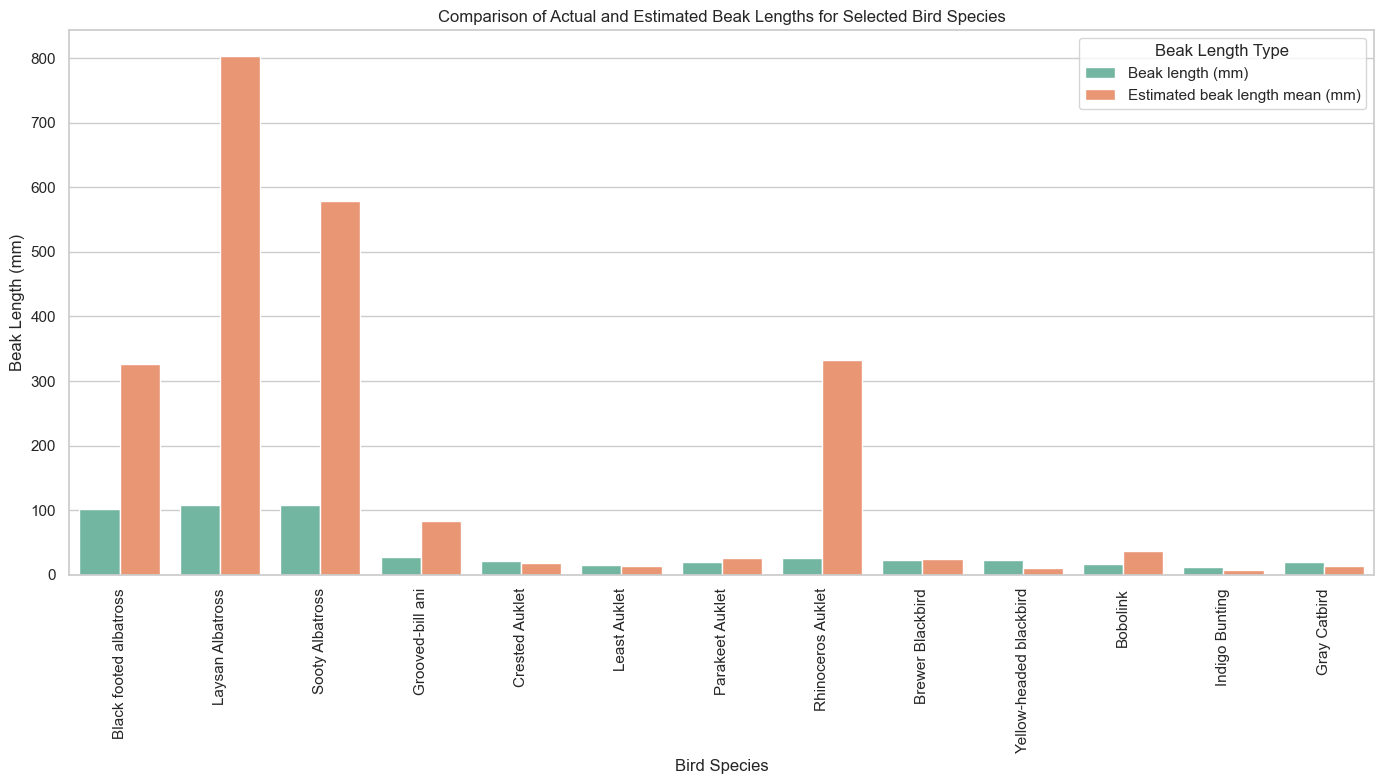

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_filtered and avonet_df are loaded
avonet_df = pd.read_csv("DATA/avonet_data.csv")

# Align the two dataframes using the species names
merged_df = pd.merge(
    df_filtered,
    avonet_df,
    left_on="bird_species_cleaned",
    right_on="Species",
    how="inner"
)

# Extract the required columns for comparison
data = {
    "Species": merged_df["bird_species_cleaned"],
    "Beak length (mm)": merged_df["Beak length culmen (mm)"],  # Actual beak length from AVONET
    "Estimated beak length mean (mm)": merged_df["estimated_beak_length_mean"]  # Estimated beak length
}

# Convert the data into a DataFrame for plotting
df = pd.DataFrame(data)

# Melt the DataFrame for use in seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
df_melted = df.melt(
    id_vars=["Species"],
    value_vars=["Beak length (mm)", "Estimated beak length mean (mm)"],
    var_name="Beak Length Type",
    value_name="Beak Length (mm)"
)

# Plot the data
sns.barplot(
    x="Species",
    y="Beak Length (mm)",
    hue="Beak Length Type",
    data=df_melted,
    palette="Set2"
)
plt.title("Comparison of Actual and Estimated Beak Lengths for Selected Bird Species")
plt.xlabel("Bird Species")
plt.ylabel("Beak Length (mm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


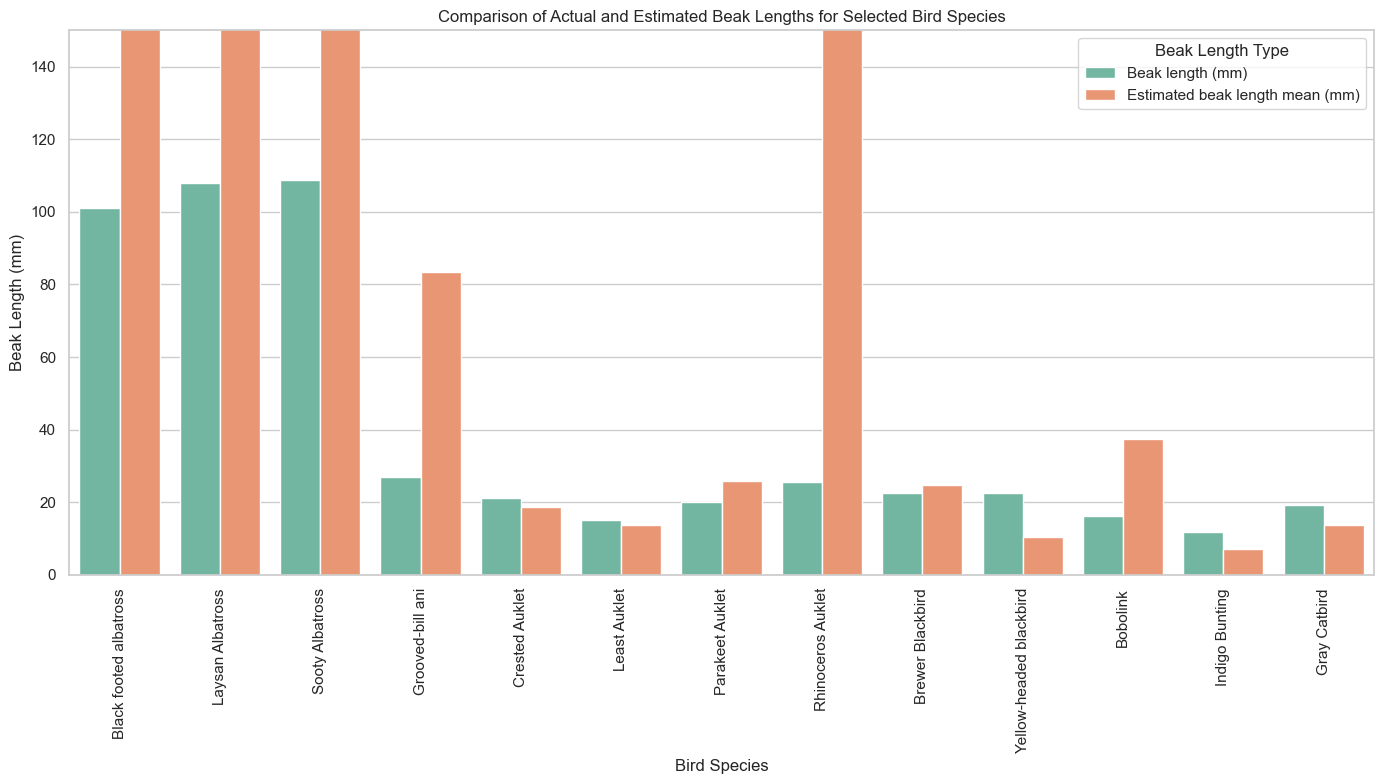

In [209]:
plt.figure(figsize=(14, 8))

sns.barplot(x="Species", y="Beak Length (mm)", hue="Beak Length Type", data=df_melted, palette="Set2")
plt.title("Comparison of Actual and Estimated Beak Lengths for Selected Bird Species")
plt.xlabel("Bird Species")
plt.ylabel("Beak Length (mm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, 150)
plt.show()

In [ ]:
from scipy.stats import ttest_1samp

# Perform one-sample t-tests for percentage differences
t_stat_median_percent, p_value_median_percent = ttest_1samp(
    df_merged['percentage_difference_median'], 10
)
t_stat_mean_percent, p_value_mean_percent = ttest_1samp(
    df_merged['percentage_difference_mean'], 10
)

print(f"One-sample t-test (Median Percentage Difference): t-statistic = {t_stat_median_percent:.4f}, p-value = {p_value_median_percent:.4f}")
print(f"One-sample t-test (Mean Percentage Difference): t-statistic = {t_stat_mean_percent:.4f}, p-value = {p_value_mean_percent:.4f}")


One-sample t-test (Median Percentage Difference): t-statistic = 5.9980, p-value = 0.0001
One-sample t-test (Mean Percentage Difference): t-statistic = 2.2966, p-value = 0.0404


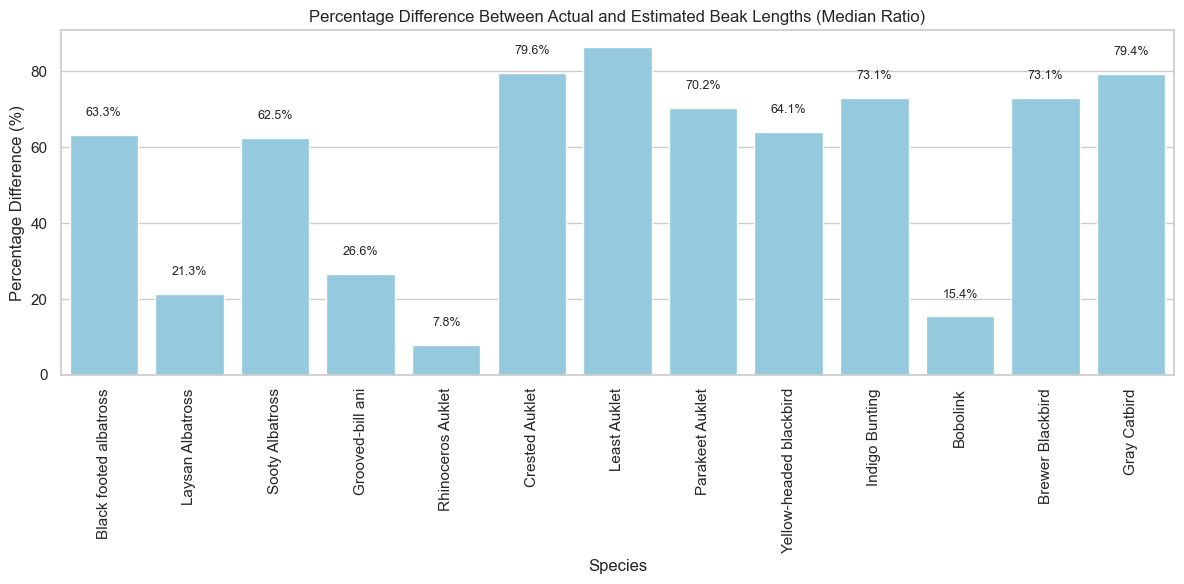

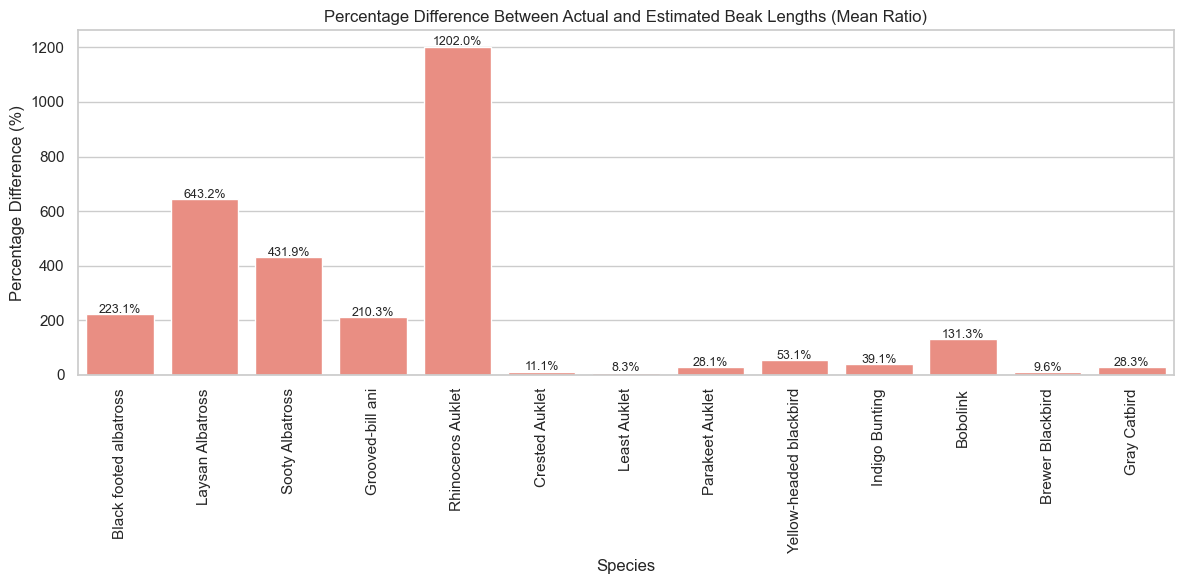

In [211]:


plt.figure(figsize=(12, 6))
median_plot = sns.barplot(
    data=df_merged, 
    x="Species", 
    y="percentage_difference_median", 
    color="skyblue", 
    order=species_order
)
plt.title("Percentage Difference Between Actual and Estimated Beak Lengths (Median Ratio)")
plt.xlabel("Species")
plt.ylabel("Percentage Difference (%)")
plt.xticks(rotation=90)

# Add percentage annotations on each bar
for bar, value in zip(median_plot.patches, df_merged['percentage_difference_median']):
    median_plot.annotate(
        f"{value:.1f}%",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 5),
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# Visualize percentage differences (Mean Ratio) with annotations
plt.figure(figsize=(12, 6))
mean_plot = sns.barplot(
    data=df_merged, 
    x="Species", 
    y="percentage_difference_mean", 
    color="salmon", 
    order=species_order
)
plt.title("Percentage Difference Between Actual and Estimated Beak Lengths (Mean Ratio)")
plt.xlabel("Species")
plt.ylabel("Percentage Difference (%)")
plt.xticks(rotation=90)

# Add percentage annotations on each bar
for bar, value in zip(mean_plot.patches, df_merged['percentage_difference_mean']):
    mean_plot.annotate(
        f"{value:.1f}%",
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 5),
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

